#Boosting Techniques
#Assignment Questions
#Theoretical Questions

Q1. What is Boosting in Machine Learning?
 - Boosting is an ensemble technique that builds a strong learner by sequentially combining multiple weak learners, typically decision trees.
Each new model focuses on correcting the errors made by the previous ones.


---


Q2. How does Boosting differ from Bagging?
 - Feature	Bagging	Boosting
Learning Style	Parallel	Sequential
Goal	Reduce variance	Reduce bias
Sample	Bootstrapped (random)	Full data with weighted samples
Example	Random Forest	AdaBoost, Gradient Boosting


---

Q3. What is the key idea behind AdaBoost?
 - AdaBoost (Adaptive Boosting) improves prediction by focusing on harder samples.
It assigns higher weights to misclassified samples so that future learners focus more on them.


---


Q4. Explain the working of AdaBoost with an example
 - Start with equal weights for all training samples.

Train a weak learner (e.g., decision stump).

Increase weights for misclassified samples.

Train the next weak learner with updated weights.

Combine predictions with a weighted vote.

Example:
If a weak learner misclassifies points A and B, their weights are increased, so the next learner prioritizes getting them right.


---


Q5. What is Gradient Boosting, and how is it different from AdaBoost?
 - Gradient Boosting builds trees to minimize a loss function using gradient descent.
Instead of adjusting sample weights like AdaBoost, it fits each new tree to the residual errors of the previous trees.


---


Q6. What is the loss function in Gradient Boosting?
 - It depends on the task:

Regression: Mean Squared Error (MSE)

Classification: Log Loss (cross-entropy)
You can also use custom loss functions.


---


Q7. How does XGBoost improve over traditional Gradient Boosting?
 - Regularization (L1 and L2) to prevent overfitting

Parallelized tree building

Built-in handling of missing values

Caching and pruning to reduce computation time

Early stopping and cross-validation


---


Q8. What is the difference between XGBoost and CatBoost?
 - Feature	XGBoost	CatBoost
Categorical Handling	Requires preprocessing (e.g., one-hot)	Built-in handling of categorical features
Speed	Very fast	Fast + efficient on categorical
GPU Support	Yes	Yes
Used For	General tabular data	Especially good for categorical


---


Q9. What are some real-world applications of Boosting techniques?
 - 🔎 Search ranking (e.g., Bing, Google)

💳 Credit scoring and fraud detection

📈 Customer churn prediction

📦 E-commerce product recommendation

🏥 Disease diagnosis in healthcare

🏆 Kaggle competitions (boosting dominates!)


---


Q10. How does regularization help in XGBoost?
 - Prevents overfitting by penalizing complex trees

Uses both L1 (sparsity) and L2 (weight shrinkage)

Helps improve generalization on unseen data


---


Q11. What are some hyperparameters to tune in Gradient Boosting models?
 - Common ones:

n_estimators: Number of boosting rounds

learning_rate: Shrinks the contribution of each tree

max_depth: Depth of each tree

min_samples_split, min_child_weight: Control node splitting

subsample, colsample_bytree: Random sampling for rows/features

reg_alpha, reg_lambda: L1/L2 regularization (XGBoost)


---


Q12. What is the concept of Feature Importance in Boosting?
 - Feature importance indicates how much each feature contributes to reducing error.
Types:

Gain: Total improvement in split criteria brought by a feature

Cover: Number of samples affected

Frequency: Number of times a feature is used for splitting


---


Q13. Why is CatBoost efficient for categorical data?
 - It automatically handles categorical features using ordered statistics and target encoding.

Avoids overfitting and data leakage with its smart encoding strategy.



#Practical Questions

In [2]:
#Q14. Train an AdaBoost Classifier on a sample dataset and print model accuracy.

from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 1. Load the dataset
data = load_breast_cancer()
X, y = data.data, data.target

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. Create AdaBoost Classifier (with decision stump as base estimator)
adaboost = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=50,
    learning_rate=1.0,
    random_state=42
)

# 4. Train the model
adaboost.fit(X_train, y_train)

# 5. Predict and evaluate
y_pred = adaboost.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"🎯 AdaBoost Classifier Accuracy: {accuracy:.4f}")


🎯 AdaBoost Classifier Accuracy: 0.9649


In [3]:
#Q15. Train an AdaBoost Regressor and evaluate performance using Mean Absolute Error (MAE).

from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# 1. Load dataset
X, y = fetch_california_housing(return_X_y=True)

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. Create AdaBoost Regressor with decision tree as base estimator
adaboost_regressor = AdaBoostRegressor(
    estimator=DecisionTreeRegressor(max_depth=4),
    n_estimators=100,
    learning_rate=0.5,
    random_state=42
)

# 4. Train the model
adaboost_regressor.fit(X_train, y_train)

# 5. Predict and evaluate using MAE
y_pred = adaboost_regressor.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)

print(f"📏 AdaBoost Regressor MAE: {mae:.4f}")


📏 AdaBoost Regressor MAE: 0.7483


In [4]:
#Q16. Train a Gradient Boosting Classifier on the Breast Cancer dataset and print feature importance.

from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
import pandas as pd

# 1. Load the dataset
data = load_breast_cancer()
X, y = data.data, data.target
feature_names = data.feature_names

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. Train Gradient Boosting Classifier
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbc.fit(X_train, y_train)

# 4. Extract and sort feature importances
importances = gbc.feature_importances_
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# 5. Display top features
print("📊 Feature Importance Scores (Descending):")
print(importance_df.to_string(index=False))


📊 Feature Importance Scores (Descending):
                Feature  Importance
    mean concave points    0.450528
   worst concave points    0.240103
           worst radius    0.075589
        worst perimeter    0.051408
          worst texture    0.039886
             worst area    0.038245
           mean texture    0.027805
        worst concavity    0.018725
        concavity error    0.013068
             area error    0.008415
           radius error    0.006870
       worst smoothness    0.004811
fractal dimension error    0.004224
          texture error    0.003604
       mean compactness    0.002996
      compactness error    0.002511
        mean smoothness    0.002467
   concave points error    0.002038
         worst symmetry    0.001478
        perimeter error    0.001157
         mean concavity    0.000922
         symmetry error    0.000703
       smoothness error    0.000556
          mean symmetry    0.000520
      worst compactness    0.000450
              mean are

In [5]:
#Q17. Train a Gradient Boosting Regressor and evaluate using R-Squared Score.

from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# 1. Load dataset
X, y = fetch_california_housing(return_X_y=True)

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. Create and train Gradient Boosting Regressor
gbr = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)
gbr.fit(X_train, y_train)

# 4. Predict and evaluate using R² score
y_pred = gbr.predict(X_test)
r2 = r2_score(y_test, y_pred)

print(f"📈 Gradient Boosting Regressor R² Score: {r2:.4f}")


📈 Gradient Boosting Regressor R² Score: 0.7756


In [8]:
#Q18. Train an XGBoost Classifier on a dataset and compare accuracy with Gradient Boosting.

from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 1. Load the dataset
data = load_breast_cancer()
X, y = data.data, data.target

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. Train Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
acc_gb = accuracy_score(y_test, y_pred_gb)

# 4. Train XGBoost Classifier (clean version for XGBoost ≥ 2.0)
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
acc_xgb = accuracy_score(y_test, y_pred_xgb)

# 5. Print comparison
print(f"🌱 Gradient Boosting Accuracy: {acc_gb:.4f}")
print(f"⚡ XGBoost Classifier Accuracy: {acc_xgb:.4f}")


🌱 Gradient Boosting Accuracy: 0.9561
⚡ XGBoost Classifier Accuracy: 0.9561


In [7]:
from sklearn.datasets import load_breast_cancer
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost (clean version for v2+)
model = XGBClassifier(eval_metric='logloss', random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"✅ XGBoost Accuracy: {acc:.4f}")


✅ XGBoost Accuracy: 0.9561


In [11]:
#Q19. Train a CatBoost Classifier and evaluate using F1-Score4.

from catboost import CatBoostClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

# 1. Load the dataset
data = load_breast_cancer()
X, y = data.data, data.target

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. Train CatBoost Classifier
model = CatBoostClassifier(
    iterations=100,
    learning_rate=0.1,
    depth=4,
    verbose=0,
    random_state=42
)

model.fit(X_train, y_train)

# 4. Predict and evaluate using F1-score
y_pred = model.predict(X_test)
f1 = f1_score(y_test, y_pred)

print(f"🎯 CatBoost Classifier F1-Score: {f1:.4f}")


🎯 CatBoost Classifier F1-Score: 0.9722


In [ ]:
!pip install catboost;


In [12]:
#Q20. Train an XGBoost Regressor and evaluate using Mean Squared Error (MSE).

from xgboost import XGBRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# 1. Load dataset
X, y = fetch_california_housing(return_X_y=True)

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. Train XGBoost Regressor
xgb_regressor = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=4,
    random_state=42
)
xgb_regressor.fit(X_train, y_train)

# 4. Predict and evaluate using MSE
y_pred = xgb_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(f"📉 XGBoost Regressor Mean Squared Error: {mse:.4f}")


📉 XGBoost Regressor Mean Squared Error: 0.2628


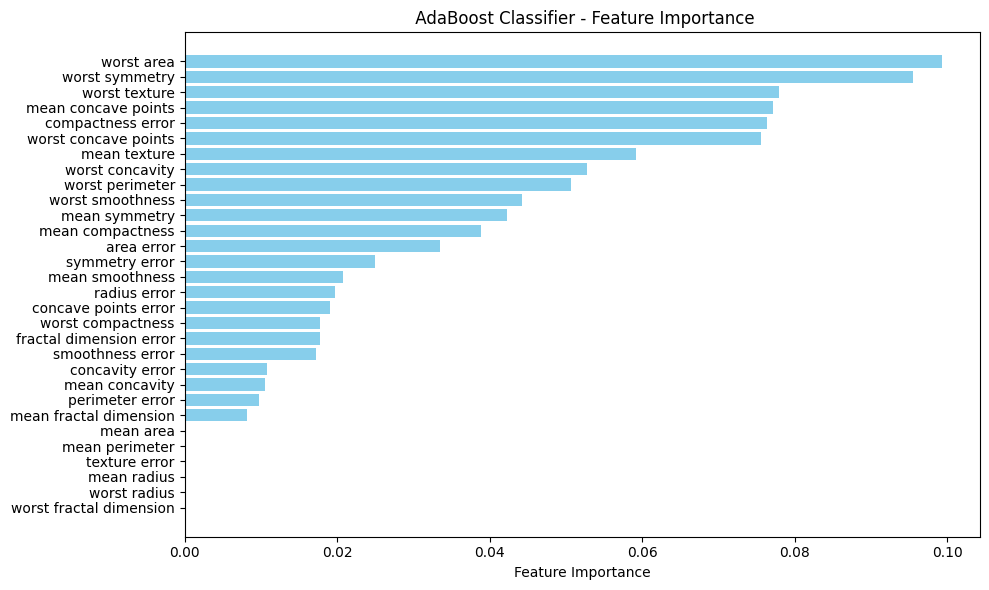

In [14]:
#Q21. Train an AdaBoost Classifier and visualize feature importance.

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# 1. Load the dataset
data = load_breast_cancer()
X, y = data.data, data.target
feature_names = data.feature_names

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. Train AdaBoost Classifier with decision stumps
model = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=100,
    learning_rate=1.0,
    random_state=42
)
model.fit(X_train, y_train)

# 4. Extract feature importances
importances = model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# 5. Plot top features
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel("Feature Importance")
plt.title(" AdaBoost Classifier - Feature Importance")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [16]:
import subprocess
subprocess.run(["pip", "install", "catboost"], stdout=subprocess.DEVNULL, stderr=subprocess.DEVNULL)


CompletedProcess(args=['pip', 'install', 'catboost'], returncode=0)

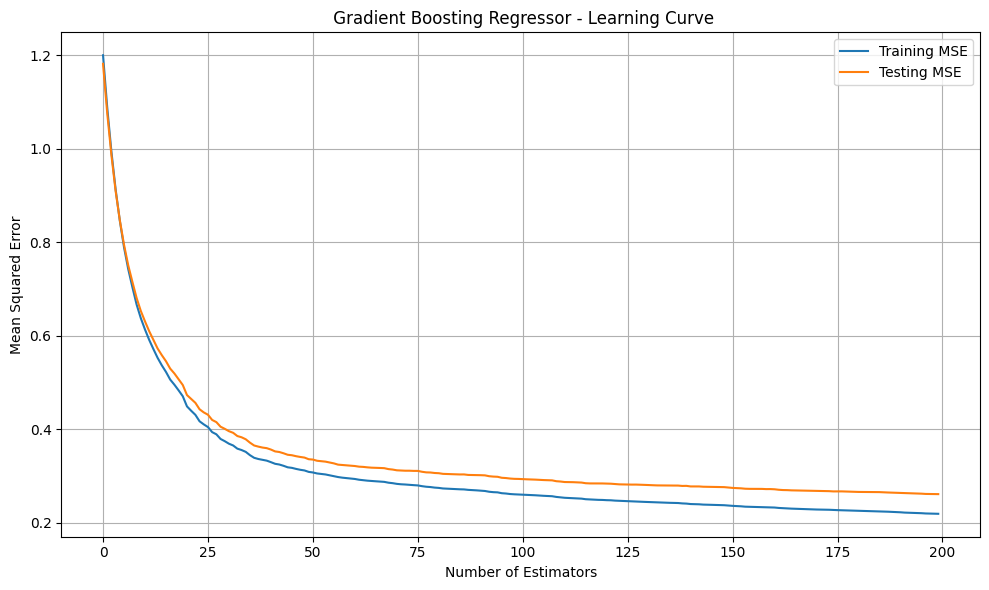

In [18]:
#Q22. Train a Gradient Boosting Regressor and plot learning curves.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# 1. Load dataset
X, y = fetch_california_housing(return_X_y=True)

# 2. Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. Train Gradient Boosting Regressor
gbr = GradientBoostingRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)
gbr.fit(X_train, y_train)

# 4. Collect staged predictions for learning curve
train_errors = []
test_errors = []

for y_train_pred in gbr.staged_predict(X_train):
    train_errors.append(mean_squared_error(y_train, y_train_pred))

for y_test_pred in gbr.staged_predict(X_test):
    test_errors.append(mean_squared_error(y_test, y_test_pred))

# 5. Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_errors, label="Training MSE")
plt.plot(test_errors, label="Testing MSE")
plt.xlabel("Number of Estimators")
plt.ylabel("Mean Squared Error")
plt.title(" Gradient Boosting Regressor - Learning Curve")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


<Figure size 1200x600 with 0 Axes>

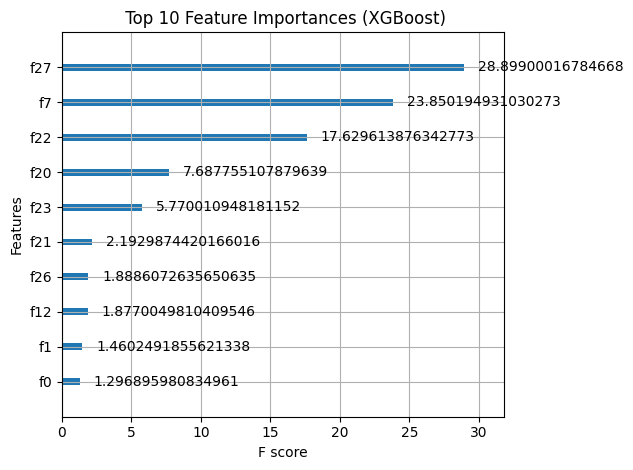

In [20]:
#Q23. Train an XGBoost Classifier and visualize feature importance.

import matplotlib.pyplot as plt
from xgboost import XGBClassifier, plot_importance
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# 1. Load dataset
data = load_breast_cancer()
X, y = data.data, data.target
feature_names = data.feature_names

# 2. Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. Train XGBoost Classifier
model = XGBClassifier(eval_metric='logloss', random_state=42)
model.fit(X_train, y_train)

# 4. Plot feature importance
plt.figure(figsize=(12, 6))
plot_importance(model, max_num_features=10, importance_type='gain', show_values=True)
plt.title(" Top 10 Feature Importances (XGBoost)")
plt.tight_layout()
plt.show()


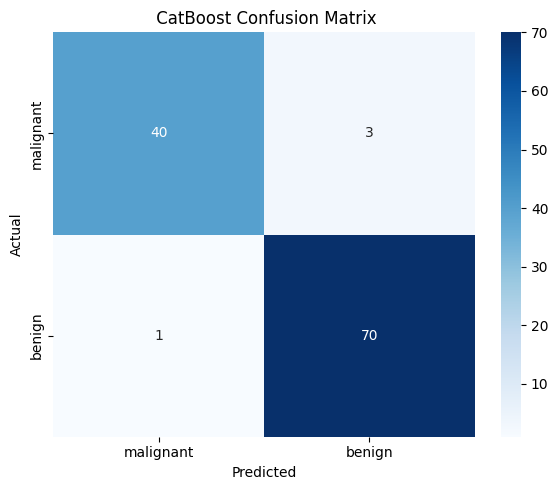

In [22]:
 #Q24. Train a CatBoost Classifier and plot the confusion matrix.

 import seaborn as sns
import matplotlib.pyplot as plt
from catboost import CatBoostClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# 1. Load dataset
data = load_breast_cancer()
X, y = data.data, data.target
class_names = data.target_names

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. Train CatBoost Classifier
model = CatBoostClassifier(
    iterations=100,
    learning_rate=0.1,
    depth=4,
    verbose=0,
    random_state=42
)
model.fit(X_train, y_train)

# 4. Predict
y_pred = model.predict(X_test)

# 5. Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# 6. Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(" CatBoost Confusion Matrix")
plt.tight_layout()
plt.show()


In [24]:
#Q25. Train an AdaBoost Classifier with different numbers of estimators and compare accuracy.

from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 1. Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# 2. Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. Try different numbers of estimators
n_estimators_list = [10, 50, 100, 200]
print(" AdaBoost Accuracy with Varying n_estimators:")
for n in n_estimators_list:
    model = AdaBoostClassifier(
        estimator=DecisionTreeClassifier(max_depth=1),
        n_estimators=n,
        learning_rate=1.0,
        random_state=42
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f" - n_estimators = {n}: Accuracy = {acc:.4f}")


 AdaBoost Accuracy with Varying n_estimators:
 - n_estimators = 10: Accuracy = 0.9649
 - n_estimators = 50: Accuracy = 0.9649
 - n_estimators = 100: Accuracy = 0.9737
 - n_estimators = 200: Accuracy = 0.9737


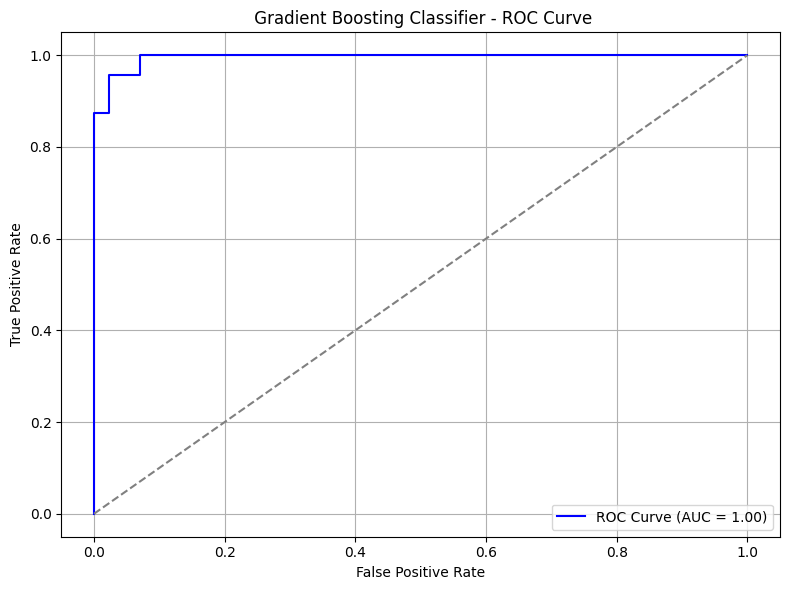

In [26]:
#Q26. Train a Gradient Boosting Classifier and visualize the ROC curve.

import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc

# 1. Load the dataset
data = load_breast_cancer()
X, y = data.data, data.target

# 2. Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. Train Gradient Boosting Classifier
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

# 4. Predict probabilities
y_prob = model.predict_proba(X_test)[:, 1]

# 5. Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# 6. Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(" Gradient Boosting Classifier - ROC Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


In [27]:
#Q27. Train an XGBoost Regressor and tune the learning rate using GridSearchCV.

from xgboost import XGBRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error

# 1. Load dataset
X, y = fetch_california_housing(return_X_y=True)

# 2. Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. Define the model
xgb = XGBRegressor(n_estimators=100, max_depth=4, random_state=42)

# 4. Define parameter grid for learning rate
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3]
}

# 5. Setup GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1
)

# 6. Train using grid search
grid_search.fit(X_train, y_train)

# 7. Predict and evaluate best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

# 8. Print results
print(" Best Learning Rate:", grid_search.best_params_['learning_rate'])
print(f" Mean Squared Error on Test Set: {mse:.4f}")


 Best Learning Rate: 0.3
 Mean Squared Error on Test Set: 0.2261


In [28]:
 #Q28. Train a CatBoost Classifier on an imbalanced dataset and compare performance with class weighting.

 from catboost import CatBoostClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import numpy as np

# 1. Create an imbalanced binary classification dataset
X, y = make_classification(
    n_samples=2000,
    n_features=20,
    n_informative=2,
    n_redundant=10,
    n_clusters_per_class=1,
    weights=[0.9, 0.1],  # 90% class 0, 10% class 1
    flip_y=0,
    random_state=42
)

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3. Train CatBoost without class weights
model_default = CatBoostClassifier(verbose=0, random_state=42)
model_default.fit(X_train, y_train)
y_pred_default = model_default.predict(X_test)
f1_default = f1_score(y_test, y_pred_default)

# 4. Compute class weights manually
class_counts = np.bincount(y_train)
class_weights = {0: 1.0, 1: class_counts[0] / class_counts[1]}  # inverse frequency

# 5. Train CatBoost with class weights
model_weighted = CatBoostClassifier(class_weights=class_weights, verbose=0, random_state=42)
model_weighted.fit(X_train, y_train)
y_pred_weighted = model_weighted.predict(X_test)
f1_weighted = f1_score(y_test, y_pred_weighted)

# 6. Print comparison
print("📊 F1-Score Comparison on Imbalanced Dataset:")
print(f" - Without Class Weights: {f1_default:.4f}")
print(f" - With Class Weights   : {f1_weighted:.4f}")


📊 F1-Score Comparison on Imbalanced Dataset:
 - Without Class Weights: 0.8750
 - With Class Weights   : 0.8764


In [29]:
#Q29. Train an AdaBoost Classifier and analyze the effect of different learning rates.

from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 1. Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. Define different learning rates to test
learning_rates = [0.01, 0.05, 0.1, 0.5, 1.0, 2.0]

print("📊 AdaBoost Accuracy with Different Learning Rates:")
for lr in learning_rates:
    model = AdaBoostClassifier(
        estimator=DecisionTreeClassifier(max_depth=1),
        n_estimators=100,
        learning_rate=lr,
        random_state=42
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f" - learning_rate = {lr}: Accuracy = {acc:.4f}")


📊 AdaBoost Accuracy with Different Learning Rates:
 - learning_rate = 0.01: Accuracy = 0.9386
 - learning_rate = 0.05: Accuracy = 0.9561
 - learning_rate = 0.1: Accuracy = 0.9561
 - learning_rate = 0.5: Accuracy = 0.9649
 - learning_rate = 1.0: Accuracy = 0.9737
 - learning_rate = 2.0: Accuracy = 0.7719


In [31]:
 #Q30. Train an XGBoost Classifier for multi-class classification and evaluate using log-loss.

from xgboost import XGBClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss

# 1. Load the Iris dataset (multi-class: 3 species)
data = load_iris()
X, y = data.data, data.target

# 2. Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3. Train XGBoost Classifier (multi-class mode)
model = XGBClassifier(
    objective='multi:softprob',  # softprob outputs class probabilities
    num_class=3,
    eval_metric='mlogloss',
    random_state=42
)
model.fit(X_train, y_train)

# 4. Predict class probabilities
y_probs = model.predict_proba(X_test)

# 5. Evaluate using log loss
logloss = log_loss(y_test, y_probs)
print(f" Multi-Class Log Loss: {logloss:.4f}")



 Multi-Class Log Loss: 0.3047
